In [52]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [53]:
train_dataset = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
train_dataset_ans = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=False)

In [54]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc0 = nn.Linear(in_features=2, out_features=9)
        self.fc1 = nn.Linear(in_features=9, out_features=1)


    def forward(self, input_data):
        out = self.fc0(input_data)
        out = F.leaky_relu(out)
        out = self.fc1(out)
        out = F.sigmoid(out)
        return out


In [55]:
model = ANN()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.BCELoss()

Epoch [1000/30000], Loss: 0.4050
Epoch [2000/30000], Loss: 0.1386
Epoch [3000/30000], Loss: 0.0586
Epoch [4000/30000], Loss: 0.0292
Epoch [5000/30000], Loss: 0.0161
Epoch [6000/30000], Loss: 0.0093
Epoch [7000/30000], Loss: 0.0056
Epoch [8000/30000], Loss: 0.0034
Epoch [9000/30000], Loss: 0.0022
Epoch [10000/30000], Loss: 0.0014
Epoch [11000/30000], Loss: 0.0009
Epoch [12000/30000], Loss: 0.0006
Epoch [13000/30000], Loss: 0.0004
Epoch [14000/30000], Loss: 0.0002
Epoch [15000/30000], Loss: 0.0001
Epoch [16000/30000], Loss: 0.0001
Epoch [17000/30000], Loss: 0.0001
Epoch [18000/30000], Loss: 0.0000
Epoch [19000/30000], Loss: 0.0000
Epoch [20000/30000], Loss: 0.0000
Epoch [21000/30000], Loss: 0.0000
Epoch [22000/30000], Loss: 0.0000
Epoch [23000/30000], Loss: 0.0000
Epoch [24000/30000], Loss: 0.0000
Epoch [25000/30000], Loss: 0.0000
Epoch [26000/30000], Loss: 0.0000
Epoch [27000/30000], Loss: 0.0000
Epoch [28000/30000], Loss: 0.0000
Epoch [29000/30000], Loss: 0.0000
Epoch [30000/30000], Lo

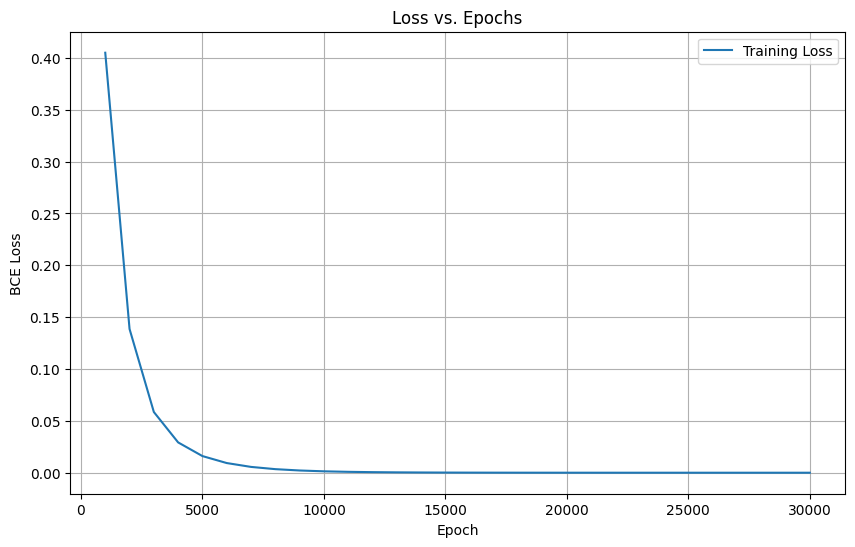

In [56]:
epochs = 30000
epoch_history = []
loss_history = []
for epoch in range(epochs):
    output = model(train_dataset)

    loss = loss_function(output, train_dataset_ans)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        epoch_history.append(epoch + 1)
        loss_history.append(loss.item())


plt.figure(figsize=(10, 6))
plt.plot(epoch_history, loss_history, label='Training Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.legend()
plt.grid(True)
plt.show()

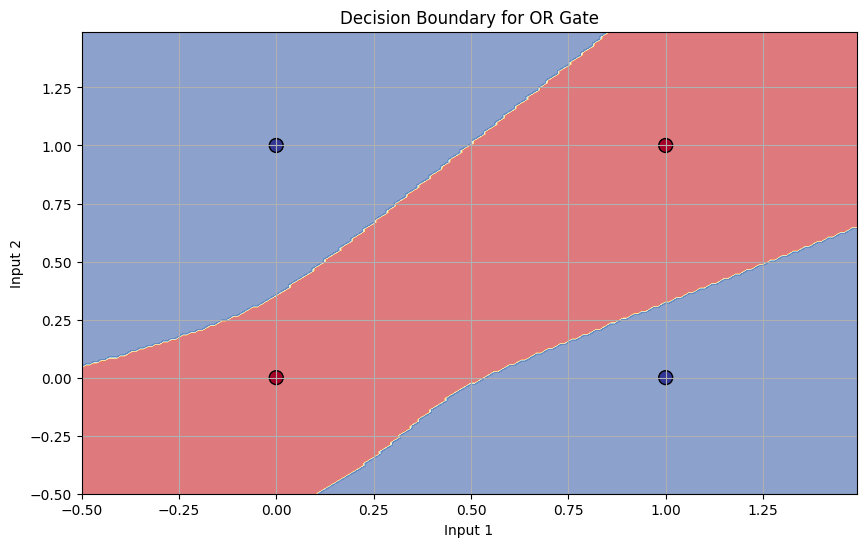

In [57]:
# grapp의 범위 설정
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
# 뿌려볼 죄표들 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# xx.ravel()과 yy.ravel()로 각 그리드 포인트를 1차원으로 풀고
# np.c_를 사용해 [x, y] 좌표 쌍의 목록으로 만듭니다.
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# 모델을 평가 모드로 설정
model.eval()
with torch.no_grad(): # Autograd 엔진을 비활성화, 계산 그래프 필요없어
    predictions = model(grid_tensor)
    # 0.5를 기준으로 클래스를 결정(0 또는 1)하고, 원래 그리드 형태로 재구성
    predicted_cls = predictions.round().numpy().reshape(xx.shape)

plt.figure(figsize=(10, 6))
# contourf를 사용해 결정 경계를 색칠
plt.contourf(xx, yy, predicted_cls, cmap=plt.cm.RdYlBu, alpha=0.6)

plt.scatter(train_dataset[:, 0], train_dataset[:, 1], c=train_dataset_ans.squeeze(),
            cmap=plt.cm.RdYlBu, s=100, edgecolors='k')

plt.title('Decision Boundary for OR Gate')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid(True)
plt.show()